<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Gabriela de Morais da Silva*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [20]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 23.9MB/s]


In [43]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import random

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

Tratamento de dados simples:

In [51]:
#Tirando coluna de Data
df_sem_data = df.drop("Data", axis = 1)

In [45]:
#transformando strings categóricas em número
encoded_df = pd.get_dummies(df_sem_data, columns=['Principais Origens do Tráfego', 'Dispositivos'])

In [49]:
# Criando matriz de correlação
dfmatriz = encoded_df.corr()
round(dfmatriz,2)

,Visitantes Únicos,Sessões,Taxa de Rejeição (%),Páginas por Sessão,Eventos,Taxa de Conversão (%),Tempo Médio de Sessão (minutos),Principais Origens do Tráfego_Direto,Principais Origens do Tráfego_Orgânico,Principais Origens do Tráfego_Pago,Principais Origens do Tráfego_Referência,Principais Origens do Tráfego_Social,Dispositivos_Desktop,Dispositivos_Mobile,Dispositivos_Tablet
Visitantes Únicos,1.00,0.97,-0.96,0.98,-0.12,0.98,0.96,-0.08,0.12,-0.02,0.10,-0.10,-0.11,0.05,0.12
Sessões,0.97,1.00,-0.97,0.98,-0.15,0.98,0.97,-0.08,0.09,-0.05,0.13,-0.08,-0.08,0.00,0.14
Taxa de Rejeição (%),-0.96,-0.97,1.00,-0.97,0.12,-0.97,-0.98,0.06,-0.11,0.10,-0.11,0.06,0.10,-0.02,-0.15
Páginas por Sessão,0.98,0.98,-0.97,1.00,-0.14,0.99,0.96,-0.05,0.09,-0.03,0.13,-0.11,-0.13,0.07,0.11
Eventos,-0.12,-0.15,0.12,-0.14,1.00,-0.13,-0.08,0.19,-0.11,0.02,0.03,-0.15,0.19,-0.08,-0.19
Taxa de Conversão (%),0.98,0.98,-0.97,0.99,-0.13,1.00,0.98,-0.07,0.10,-0.05,0.11,-0.07,-0.11,0.03,0.14
Tempo Médio de Sessão (minutos),0.96,0.97,-0.98,0.96,-0.08,0.98,1.00,-0.08,0.12,-0.09,0.13,-0.07,-0.09,0.01,0.16
Principais Origens do Tráfego_Direto,-0.08,-0.08,0.06,-0.05,0.19,-0.07,-0.08,1.00,-0.43,-0.25,-0.23,-0.32,0.16,-0.04,-0.21
Principais Origens do Tráfego_Orgânico,0.12,0.09,-0.11,0.09,-0.11,0.10,0.12,-0.43,1.00,-0.23,-0.21,-0.30,-0.28,0.17,0.21
Principais Origens do Tráfego_Pago,-0.02,-0.05,0.10,-0.03,0.02,-0.05,-0.09,-0.25,-0.23,1.00,-0.12,-0.17,0.04,0.02,-0.11


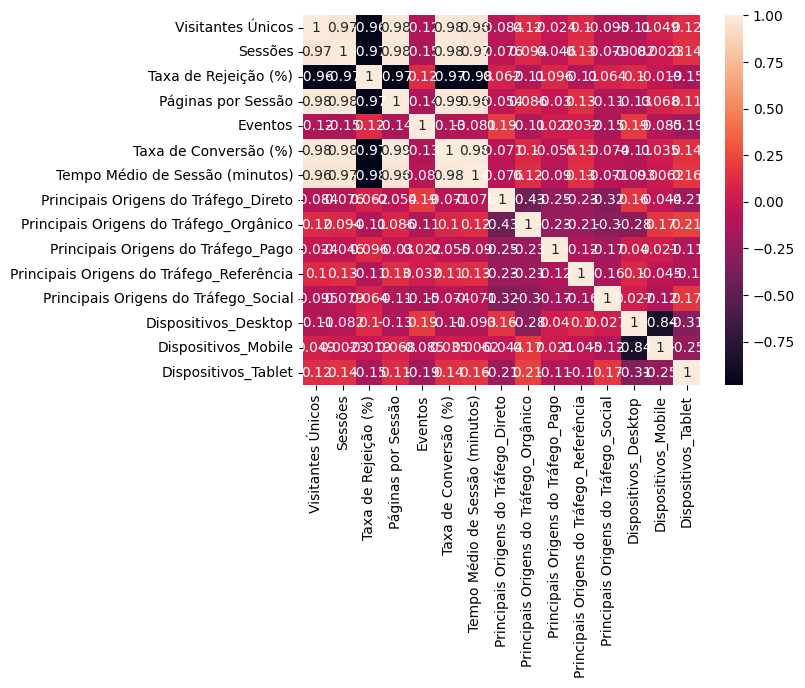

In [50]:
sn.heatmap(dfmatriz, annot=True)
plt.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

 taxa de conversão, tempo médio de sessão e taxa de rejeição,


In [61]:
encoded_df['Taxa de Rejeição (%)'].mean()

34.230938537268486

In [58]:
encoded_df['Taxa de Conversão (%)'].mean()

4.499631657295852

In [59]:
encoded_df['Tempo Médio de Sessão (minutos)'].mean()

10.045957126518564

In [63]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)
t_reje = list(range(1, 34))
t_conv = list(range(1, 4))
t_med = list(range(1, 10))
print(t_reje)
print(t_conv)
print(t_med)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

In [ ]:
# Escreva sua resposta nesta seção (Você pode criar quantas células de texto e de código forem necessárias)

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.